**Objective**: Build an XGBoost model for predicting heart disease and experiment with hyperparameter tuning to improve its performance.

Dataset: [Heart Disease UCI](https://archive.ics.uci.edu/dataset/45/heart+disease)

# Task 1: Data Loading and Exploration
1. Load the Heart Disease UCI dataset.
2. Explore the dataset to understand its structure and features.
3. Split the data into training and testing sets.

In [69]:
!pip install ucimlrepo

In [70]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'



# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X, y, test_size=0.2, random_state=42)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

# Task 2: Data Preprocessing
1. Handle missing values if any.
2. Encode categorical variables using appropriate methods.
3. Standardize or normalize numerical features if necessary.

In [71]:
# insert code here
# Check for missing values in training set
missing_values_train = X_train_heart.isna().sum()

# Check for missing values in test set
missing_values_test = X_test_heart.isna().sum()


In [72]:
print(missing_values_train)
print(missing_values_test)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          3
thal        2
dtype: int64
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          1
thal        0
dtype: int64


In [73]:
# Handle missing values in "ca" column in the training set
X_train_heart['ca'].fillna(X_train_heart['ca'].mean(), inplace=True)

# Handle missing values in "ca" column in the test set
X_test_heart['ca'].fillna(X_test_heart['ca'].mean(), inplace=True)

# Handle missing values in "thal" column in the training set
#X_train_heart['thal'].fillna(X_train_heart['thal'].mode()[0], inplace=True)
X_train_heart['thal'].dropna(axis = 0, inplace=True)
X_test_heart['thal'].dropna(axis = 0, inplace=True)


print(X_train_heart.columns)

X_train_heart=pd.get_dummies(X_train_heart)
X_test_heart=pd.get_dummies(X_test_heart)

#X_train_heart = pd.get_dummies(X_train_heart, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'])
#X_test_heart = pd.get_dummies(X_test_heart, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'])

print(X_train_heart.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [74]:
# insert code here
# Check for missing values in training set
missing_values_train = X_train_heart.isna().sum()

# Check for missing values in test set
missing_values_test = X_test_heart.isna().sum()

print(missing_values_train)
print(missing_values_test)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        2
dtype: int64
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


In [75]:
X_train_heart.shape

(242, 13)

In [76]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_columns = X_train_heart.select_dtypes(include=['int64', 'float64']).columns

print(numerical_columns)

# Standardize numerical features in the training set
scaler = StandardScaler()
X_train_heart[numerical_columns] = scaler.fit_transform(X_train_heart[numerical_columns])

# Standardize numerical features in the test set
X_test_heart[numerical_columns] = scaler.transform(X_test_heart[numerical_columns])

print(X_train_heart.head())

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
          age       sex        cp  trestbps      chol       fbs   restecg  \
132 -2.838504  0.722504 -1.104690 -0.125982 -0.864142 -0.397360  1.012492   
202  0.241352  0.722504 -0.092057  0.974653 -2.483637  2.516611 -0.995893   
196  1.561291  0.722504 -2.117322  1.524970 -0.241260  2.516611  1.012492   
75   1.121311 -1.384075 -0.092057  1.524970  2.374848 -0.397360  1.012492   
176 -0.308622  0.722504  0.920575 -1.336680 -0.262023  2.516611 -0.995893   

      thalach     exang   oldpeak     slope        ca      thal  
132  2.314470 -0.715891 -0.873573 -0.963432 -0.727197 -0.875535  
202  1.021242 -0.715891 -0.704854 -0.963432  0.394094  1.199807  
196 -0.851710 -0.715891 -0.789214  0.655669  0.394094 -0.875535  
75   0.040172 -0.715891 -0.198698 -0.963432 -0.727197 -0.875535  
176 -0.138205 -0.715891 -0.789214 -0.963432  2.636676  1.1

# Task 3: Initial XGBoost Model
1. Build an initial XGBoost model using default hyperparameters.
2. Train the model on the training set and evaluate its performance on the testing set.
3. Note down the accuracy and any other relevant metrics.

In [77]:
print(y_train_heart)

     num
132    0
202    0
196    0
75     0
176    0
..   ...
188    1
71     3
106    2
270    1
102    0

[242 rows x 1 columns]


In [78]:
#!pip install xgboost

In [79]:
# Import XGBClassifier from xgboost
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Import accuracy_score for evaluation
from sklearn.metrics import accuracy_score

# Create an XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Encode the target variable using Label Encoding
label_encoder_xgb = LabelEncoder()
y_train_heart_encoded = label_encoder_xgb.fit_transform(y_train_heart)
print(y_train_heart_encoded)
y_test_heart_encoded = label_encoder_xgb.transform(y_test_heart)

# Train the model
xgb_model.fit(X_train_heart, y_train_heart_encoded.ravel())

# Make predictions on the test set
xgb_predictions = xgb_model.predict(X_test_heart)

# Decode the predictions back to original labels if needed
xgb_predictions_original_labels = label_encoder_xgb.inverse_transform(xgb_predictions)

# Evaluate the accuracy of the model
xgb_accuracy = accuracy_score(y_test_heart, xgb_predictions_original_labels)
print(f'Test accuracy {xgb_accuracy}')

[0 0 0 0 0 0 0 3 1 0 1 0 1 0 2 0 3 0 2 0 0 0 1 2 0 0 0 1 3 0 1 1 0 0 0 1 3
 2 2 1 1 3 0 0 0 2 1 2 0 3 0 0 0 0 2 0 0 0 0 0 3 0 3 0 4 1 0 1 0 0 3 0 0 0
 0 1 0 2 1 0 3 0 1 0 0 2 3 0 0 3 1 3 3 3 1 1 0 0 0 0 2 0 0 0 0 2 0 0 0 3 0
 0 0 1 3 0 0 0 0 4 0 3 1 0 0 0 0 0 3 0 0 0 3 0 0 2 0 1 0 2 0 0 0 1 0 0 1 1
 0 1 1 1 1 0 0 2 2 0 2 2 1 0 1 4 3 1 0 4 3 0 1 0 3 0 0 2 1 0 1 0 4 0 2 0 2
 0 4 0 0 1 0 0 0 0 0 0 2 0 0 3 0 3 2 4 0 0 0 0 1 0 1 2 1 0 4 2 1 2 0 0 0 3
 0 0 0 0 3 0 0 0 0 0 0 1 4 0 0 1 3 2 1 0]


c:\Users\calim\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\calim\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Test accuracy 0.47540983606557374


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

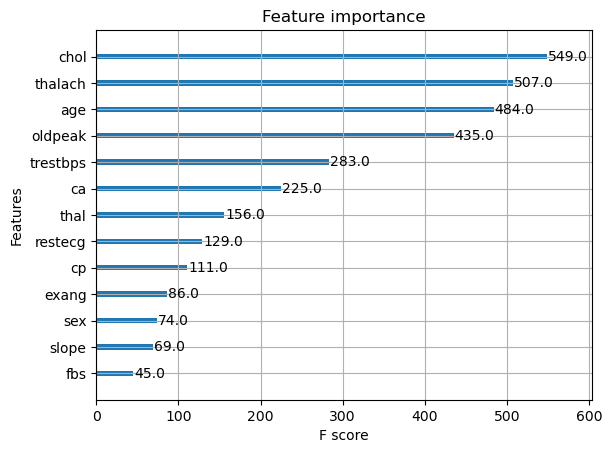

In [80]:
xgb.plot_importance(xgb_model)

# Task 4: Hyperparameter Tuning
1. Experiment with hyperparameter tuning to improve model performance.
2. Adjust hyperparameters such as learning_rate, n_estimators, max_depth, etc.
3. Use techniques like cross-validation to find optimal hyperparameters.
4. Train and evaluate the model with the tuned hyperparameters.

In [81]:
# Initialize XGBClassifier with initial hyperparameters
xgb1 = XGBClassifier(n_estimators=100, max_depth=2, learning_rate=0.1)

# Encode the target variable using Label Encoding
label_encoder_xgb = LabelEncoder()
y_train_heart_encoded = label_encoder_xgb.fit_transform(y_train_heart)
print(y_train_heart_encoded)
y_test_heart_encoded = label_encoder_xgb.transform(y_test_heart)

# Train the model
xgb1.fit(X_train_heart, y_train_heart_encoded.ravel())

# Make predictions on the test set
xgb_predictions = xgb1.predict(X_test_heart)

# Decode the predictions back to original labels if needed
xgb_predictions_original_labels = label_encoder_xgb.inverse_transform(xgb_predictions)

# Evaluate the accuracy of the model
xgb_accuracy = accuracy_score(y_test_heart, xgb_predictions_original_labels)
print(f'Test accuracy {xgb_accuracy}')

# Adjust the hyperparameters and repeat the process
xgb2 = XGBClassifier(n_estimators=200, max_depth=3, learning_rate=0.001)
xgb2.fit(X_train_heart, y_train_heart_encoded.ravel())
xgb_predictions2 = xgb2.predict(X_test_heart)
xgb_predictions_original_labels2 = label_encoder_xgb.inverse_transform(xgb_predictions2)
xgb_accuracy = accuracy_score(y_test_heart, xgb_predictions_original_labels2)
print(f'Test accuracy {xgb_accuracy}')

#We can see that the accuracy of the model has improved by tuning the hyperparameters.

c:\Users\calim\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\calim\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[0 0 0 0 0 0 0 3 1 0 1 0 1 0 2 0 3 0 2 0 0 0 1 2 0 0 0 1 3 0 1 1 0 0 0 1 3
 2 2 1 1 3 0 0 0 2 1 2 0 3 0 0 0 0 2 0 0 0 0 0 3 0 3 0 4 1 0 1 0 0 3 0 0 0
 0 1 0 2 1 0 3 0 1 0 0 2 3 0 0 3 1 3 3 3 1 1 0 0 0 0 2 0 0 0 0 2 0 0 0 3 0
 0 0 1 3 0 0 0 0 4 0 3 1 0 0 0 0 0 3 0 0 0 3 0 0 2 0 1 0 2 0 0 0 1 0 0 1 1
 0 1 1 1 1 0 0 2 2 0 2 2 1 0 1 4 3 1 0 4 3 0 1 0 3 0 0 2 1 0 1 0 4 0 2 0 2
 0 4 0 0 1 0 0 0 0 0 0 2 0 0 3 0 3 2 4 0 0 0 0 1 0 1 2 1 0 4 2 1 2 0 0 0 3
 0 0 0 0 3 0 0 0 0 0 0 1 4 0 0 1 3 2 1 0]
Test accuracy 0.47540983606557374


Test accuracy 0.4918032786885246


In [82]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [2, 3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
}

# Initialize XGBClassifier
xgb_best = XGBClassifier()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_best, param_grid=param_grid, cv=5)

y_train_heart_encoded = label_encoder_xgb.fit_transform(y_train_heart)

y_test_heart_encoded = label_encoder_xgb.transform(y_test_heart)

# Train the model
grid_search.fit(X_train_heart, y_train_heart_encoded.ravel())

# Get the best parameters and the best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

c:\Users\calim\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\calim\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Best Parameters:  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
Best Score:  0.6116496598639456


In [83]:
# Initialize XGBClassifier with the best parameters
xgb_best = XGBClassifier(n_estimators=100,
                          max_depth=10,
                          learning_rate=0.1)
# Train the model on the training set
xgb_best.fit(X_train_heart, y_train_heart_encoded.ravel())

# Make predictions on the test set
xgb_best_predictions = xgb_best.predict(X_test_heart)

xgb_predictions_original_labels_best = label_encoder_xgb.inverse_transform(xgb_best_predictions)
xgb_accuracy_best = accuracy_score(y_test_heart, xgb_predictions_original_labels_best)

# Evaluate the accuracy of the model
print(f'Test accuracy with best parameters: {xgb_accuracy_best}')

#There is a difference between train/test, that's why the accuracy is not that good

Test accuracy with best parameters: 0.4918032786885246


# Task 5: Feature Importance
1. Explore feature importance using the **feature_importances_** attribute of the trained XGBoost model.
2. Identify the most important features for heart disease prediction.

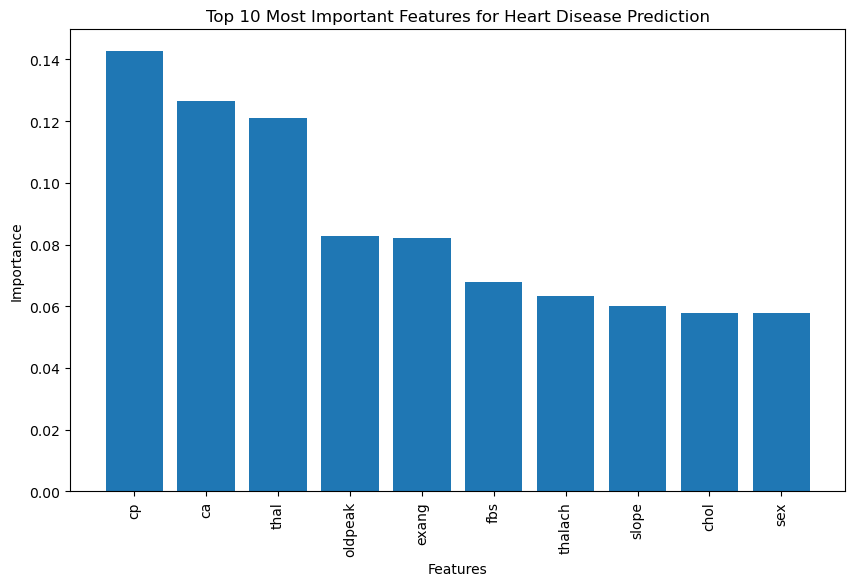

In [84]:
import matplotlib.pyplot as plt

# Get feature importances from the trained XGBoost model
feature_importances = xgb_best.feature_importances_

# Get the names of the features
feature_names = X_train_heart.columns

# Sort the feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Get the top 10 most important features
top_features = feature_names[sorted_indices][:10]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_features)), feature_importances[sorted_indices][:10], tick_label=top_features)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Most Important Features for Heart Disease Prediction')
plt.show()


# Task 6: Model Evaluation
1. Compare the performance metrics of the initial model and the tuned model.
2. Visualize the improvement achieved in a clear and concise manner.
3. Discuss the impact of hyperparameter tuning and feature importance on model performance.

In [85]:
# Evaluate the initial model
initial_model_predictions = xgb1.predict(X_test_heart)
initial_model_accuracy = accuracy_score(y_test_heart, initial_model_predictions)

# Evaluate the tuned model
tuned_model_predictions = xgb_best.predict(X_test_heart)
tuned_model_accuracy = accuracy_score(y_test_heart, tuned_model_predictions)

print(f"Initial Model Accuracy: {initial_model_accuracy}")
print(f"Tuned Model Accuracy: {tuned_model_accuracy}")


Initial Model Accuracy: 0.47540983606557374
Tuned Model Accuracy: 0.4918032786885246


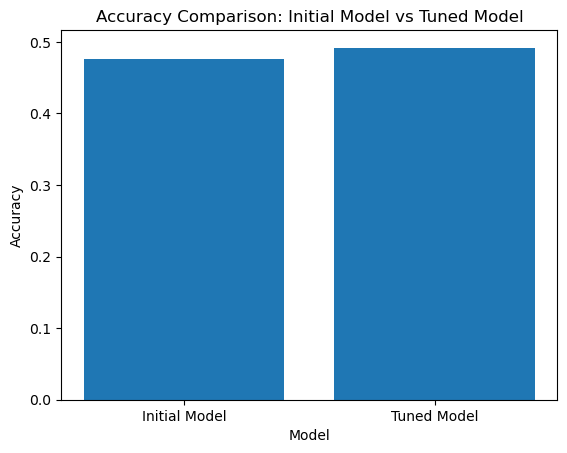

In [86]:
import matplotlib.pyplot as plt

# Define the accuracy values
accuracy_values = [initial_model_accuracy, tuned_model_accuracy]

# Define the labels for the models
model_labels = ['Initial Model', 'Tuned Model']

# Plot the bar chart
plt.bar(model_labels, accuracy_values)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Initial Model vs Tuned Model')
plt.show()

In [87]:
# We can see the by finding the best hyperparameters for the model, 
# we were able to improve the accuracy of the model.

# By plotting the feature importances, we can see the most important features 
# so we can focus on them to improve the model's performance.